Импортируем необходимыембиблиотеки

In [43]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Загрузим датасет и посмотрим на признаки

In [7]:
# Загрузка данных
data = pd.read_csv("ClientsData.csv")
data.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15223 non-null  int64  
 1   SOCSTATUS_WORK_FL  15223 non-null  int64  
 2   SOCSTATUS_PENS_FL  15223 non-null  int64  
 3   GENDER             15223 non-null  int64  
 4   CHILD_TOTAL        15223 non-null  int64  
 5   DEPENDANTS         15223 non-null  int64  
 6   PERSONAL_INCOME    15223 non-null  float64
 7   LOAN_NUM_TOTAL     15223 non-null  int64  
 8   LOAN_NUM_CLOSED    15223 non-null  int64  
 9   LOAN_DLQ_NUM       15223 non-null  int64  
 10  TARGET             15223 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.3 MB


In [10]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15218    False
15219     True
15220    False
15221    False
15222    False
Length: 15223, dtype: bool

In [11]:
data.duplicated().sum()

2819

In [13]:
df = data.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12404 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                12404 non-null  int64  
 1   SOCSTATUS_WORK_FL  12404 non-null  int64  
 2   SOCSTATUS_PENS_FL  12404 non-null  int64  
 3   GENDER             12404 non-null  int64  
 4   CHILD_TOTAL        12404 non-null  int64  
 5   DEPENDANTS         12404 non-null  int64  
 6   PERSONAL_INCOME    12404 non-null  float64
 7   LOAN_NUM_TOTAL     12404 non-null  int64  
 8   LOAN_NUM_CLOSED    12404 non-null  int64  
 9   LOAN_DLQ_NUM       12404 non-null  int64  
 10  TARGET             12404 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.1 MB


In [17]:
df.isna().sum()

AGE                  0
SOCSTATUS_WORK_FL    0
SOCSTATUS_PENS_FL    0
GENDER               0
CHILD_TOTAL          0
DEPENDANTS           0
PERSONAL_INCOME      0
LOAN_NUM_TOTAL       0
LOAN_NUM_CLOSED      0
LOAN_DLQ_NUM         0
TARGET               0
dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,12404.0,41.456304,11.541404,21.0,32.0,41.0,51.0,67.0
SOCSTATUS_WORK_FL,12404.0,0.899065,0.301255,0.0,1.0,1.0,1.0,1.0
SOCSTATUS_PENS_FL,12404.0,0.153096,0.360094,0.0,0.0,0.0,0.0,1.0
GENDER,12404.0,0.643099,0.479105,0.0,0.0,1.0,1.0,1.0
CHILD_TOTAL,12404.0,1.163254,1.025295,0.0,0.0,1.0,2.0,10.0
DEPENDANTS,12404.0,0.655353,0.833935,0.0,0.0,0.0,1.0,7.0
PERSONAL_INCOME,12404.0,14106.510025,9620.496226,24.0,8000.0,12000.0,17000.0,250000.0
LOAN_NUM_TOTAL,12404.0,1.456546,0.851157,1.0,1.0,1.0,2.0,11.0
LOAN_NUM_CLOSED,12404.0,0.829329,1.039791,0.0,0.0,1.0,1.0,11.0
LOAN_DLQ_NUM,12404.0,0.233957,0.749805,0.0,0.0,0.0,0.0,13.0


In [27]:
def unique_values_per_column(df):
    unique_values = {}
    for col in df.columns:
      unique_values[col] = df[col].unique().tolist()
    return unique_values

In [28]:
unique_values = unique_values_per_column(df)
for col, values in unique_values.items():
  print(f"Столбец {col}: {values}")

Столбец AGE: [49, 32, 52, 39, 30, 29, 35, 41, 53, 43, 54, 26, 62, 45, 38, 65, 34, 28, 37, 42, 33, 27, 31, 40, 63, 61, 44, 59, 48, 24, 23, 47, 58, 51, 56, 22, 36, 57, 50, 46, 55, 66, 25, 60, 64, 21, 67]
Столбец SOCSTATUS_WORK_FL: [1, 0]
Столбец SOCSTATUS_PENS_FL: [0, 1]
Столбец GENDER: [1, 0]
Столбец CHILD_TOTAL: [2, 3, 4, 1, 0, 5, 6, 7, 8, 10]
Столбец DEPENDANTS: [1, 3, 0, 2, 4, 5, 6, 7]
Столбец PERSONAL_INCOME: [5000.0, 12000.0, 9000.0, 25000.0, 15000.0, 6000.0, 100000.0, 7000.0, 19000.0, 18000.0, 20000.0, 60000.0, 10000.0, 5200.0, 35000.0, 14000.0, 8000.0, 13000.0, 12500.0, 11000.0, 30000.0, 23000.0, 4000.0, 50000.0, 40000.0, 5700.0, 12800.0, 5500.0, 4800.0, 5300.0, 11700.0, 7500.0, 8500.0, 7300.0, 14500.0, 3000.0, 27000.0, 13500.0, 6500.0, 8600.0, 38000.0, 6200.0, 10500.0, 170000.0, 7800.0, 3300.0, 9300.0, 17000.0, 28000.0, 2300.0, 32000.0, 21000.0, 8400.0, 5600.0, 9800.0, 4300.0, 24000.0, 4500.0, 16000.0, 4950.0, 9500.0, 4600.0, 36000.0, 55000.0, 45000.0, 29000.0, 13900.0, 6300.0, 

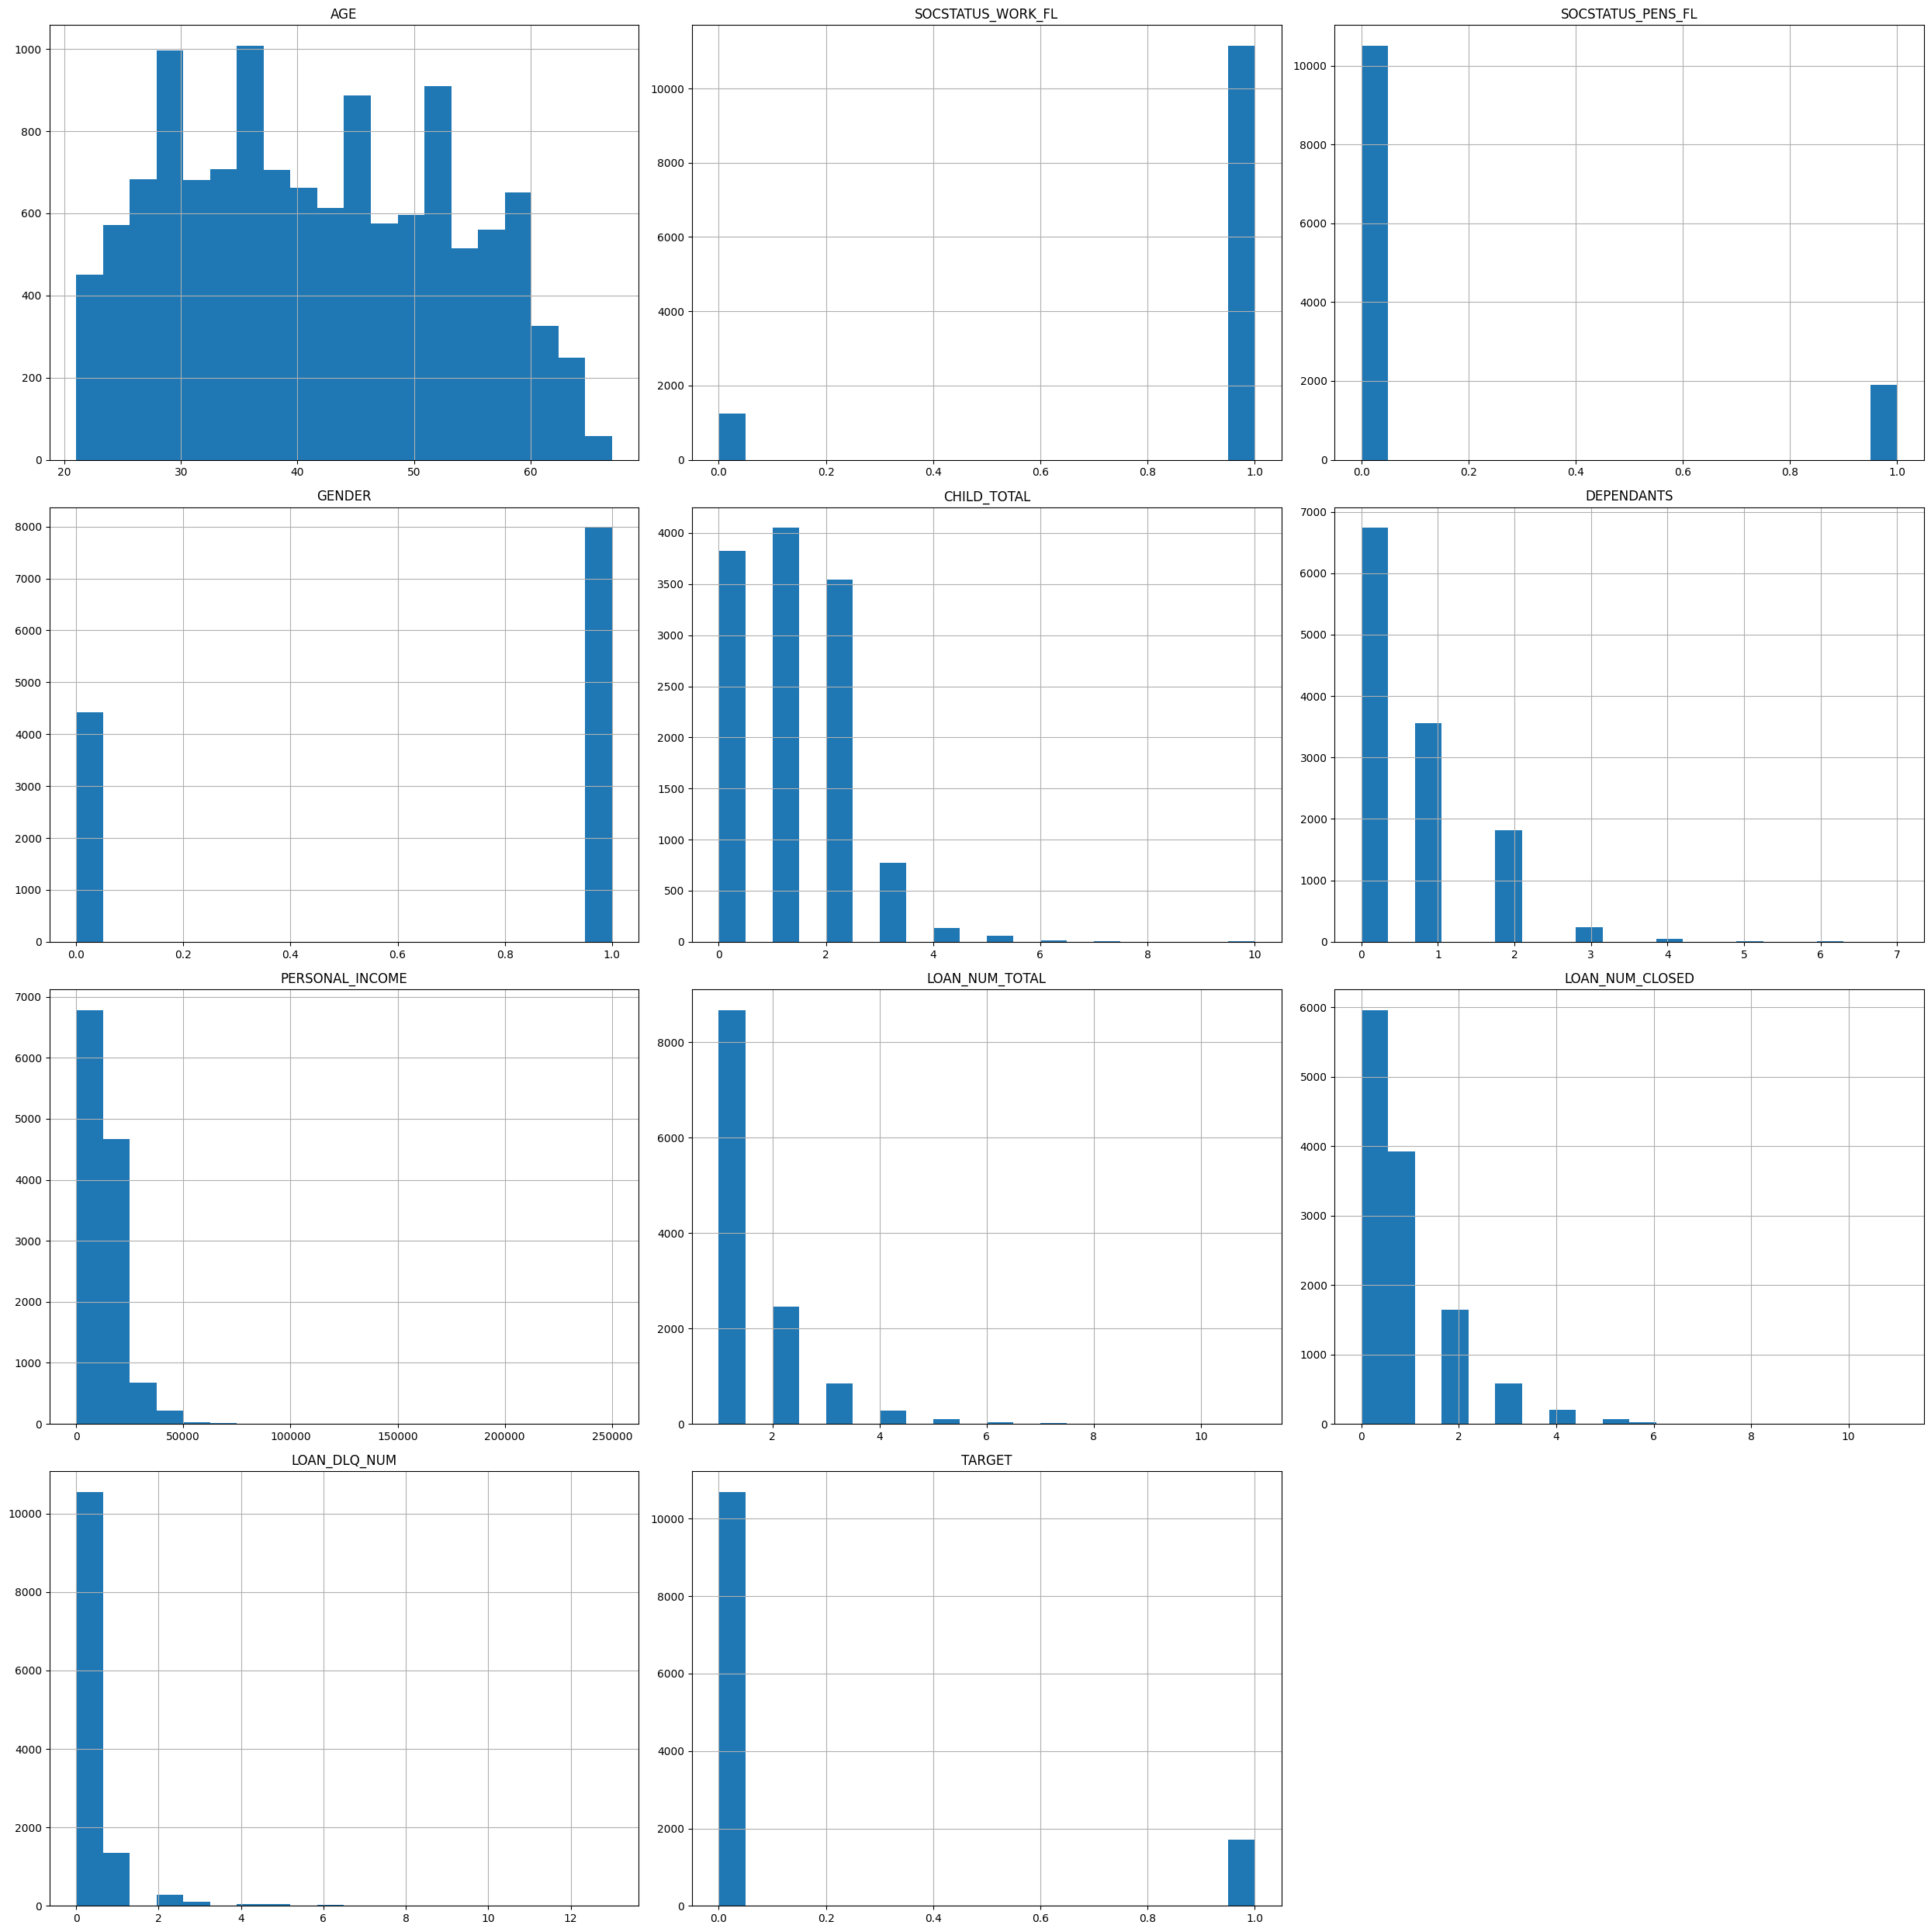

In [30]:
df.hist(figsize=(25, 25), bins=20)
plt.tight_layout()

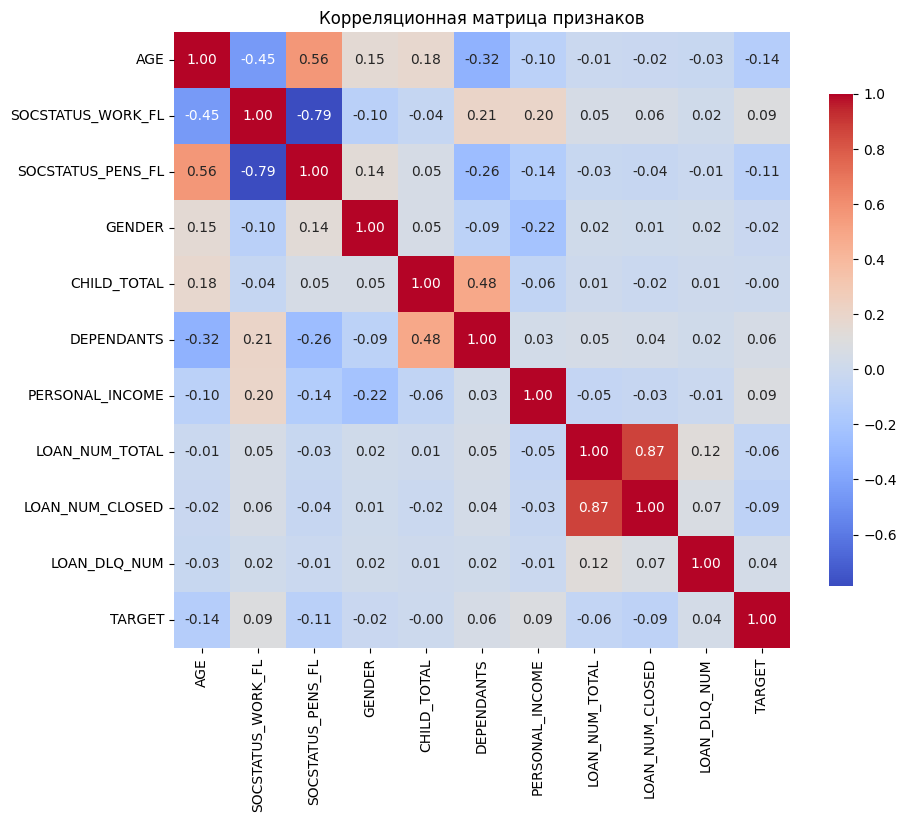

In [34]:
# Вычисляем корреляционную матрицу
correlation_matrix = df.corr()

# Настраиваем размер графика
plt.figure(figsize=(10, 8))

# Создаем тепловую карту
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", cbar_kws={"shrink": .8})

# Добавляем заголовок
plt.title('Корреляционная матрица признаков')

# Показываем график
plt.show()

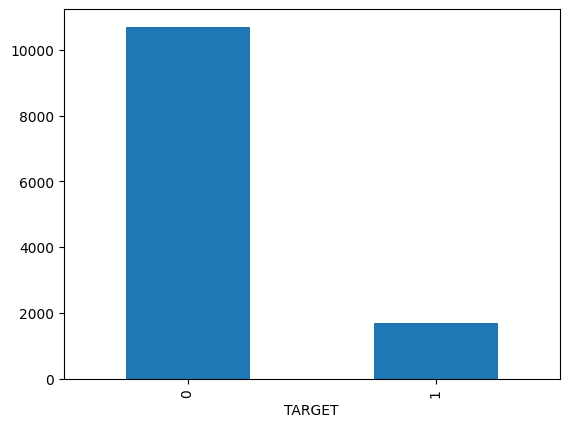

In [54]:
df.TARGET.value_counts().plot(kind='bar');

Наблюдаем сильный дисбаланс в классах. 

In [35]:
# Масштабирование числовых признаков
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 0.65364661,  0.33506247, -0.4251718 , ...,  0.16414612,
         2.35543207, -0.39974279],
       [-0.81937046,  0.33506247, -0.4251718 , ...,  0.16414612,
         1.02169796, -0.39974279],
       [ 0.9135908 ,  0.33506247, -0.4251718 , ...,  0.16414612,
        -0.31203615, -0.39974279],
       ...,
       [-1.6858511 ,  0.33506247, -0.4251718 , ..., -0.79762451,
        -0.31203615, -0.39974279],
       [ 1.60677531, -2.98451809,  2.35199041, ..., -0.79762451,
        -0.31203615, -0.39974279],
       [-0.38613015,  0.33506247, -0.4251718 , ..., -0.79762451,
        -0.31203615, -0.39974279]])

In [36]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df.drop("TARGET", axis=1), df["TARGET"], test_size=0.2, random_state=42)

In [37]:
# Создание модели линейной регрессии с L2-регуляризацией (Ridge)
model = Ridge()

In [44]:
# Подбор параметров модели с помощью GridSearchCV
param_grid = {"alpha": [0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", cv=5)
grid_search.fit(X_train, y_train)

/home/zaur/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/zaur/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/zaur/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/zaur/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10]},
             scoring='roc_auc')

In [39]:
# Лучшая модель
best_model = grid_search.best_estimator_

In [40]:
# Предсказание лояльности
y_pred = best_model.predict(X_test)

In [52]:
# Оценка качества модели
print("Точность:", accuracy_score(y_test, (y_pred > 0.5).astype(int)))
print("Точность:", precision_score(y_test, (y_pred > 0.5).astype(int)))
print("Полнота:", recall_score(y_test, (y_pred > 0.5).astype(int)))
print("F1-мера:", f1_score(y_test, (y_pred > 0.5).astype(int)))
print("AUC:", roc_auc_score(y_test, y_pred))

Точность: 0.8625554212011286
Точность: 0.0
Полнота: 0.0
F1-мера: 0.0
AUC: 0.688831874932864


Эти метрики показывают, что модель работает очень плохо в классификации положительных случаев. Давайте разберем их по порядку:

 Accuracy_score: 0.8625554212011286 -  Эта метрика говорит о том, что модель правильно классифицирует 86,25% всех случаев. Это может быть обманчиво, так как может быть дисбаланс классов.  
 Precision_score: 0.0 -  Точность показывает, какой процент классифицированных как положительных случаев действительно положительны.  Значение 0.0 означает, что ни один из предсказанных положительных случаев не был верным.
 Recall_score: 0.0 -  Полнота показывает, какой процент всех положительных случаев был правильно идентифицирован моделью. Значение 0.0 означает, что модель не смогла идентифицировать ни одного положительного случая.
 F1_score: 0.0 -  F1-мера  является гармоническим средним между точностью и полнотой.  Низкое значение 0.0 говорит о том, что модель не работает хорошо ни в одной из этих метрик.
 AUC: 0.688831874932864 - AUC  (площадь под кривой ROC) является хорошей метрикой для оценки качества классификации, но значение 0.6888  не является впечатляющим.  Идеальное значение AUC равно 1.0, значение 0.5 соответствует случайному прогнозу.

Вывод:

Модель классифицирует большинство случаев как отрицательные (что может быть причиной высокой точности), но полностью проваливается в идентификации положительных случаев. Это говорит о том, что  есть проблемы с моделью и/или данными:

 Дисбаланс классов:  Возможно, в данных намного больше отрицательных, чем положительных примеров. Это может привести к высокой точности, но низкой полноте и точности.  
 Недостаточное обучение:  Возможно, модель просто недостаточно обучена для классификации положительных случаев. 
 Неправильные признаки:  Возможно, данные содержат не те признаки, которые позволяют модели  правильно  классифицировать  положительные  случаи. 
